# ASIMOV - Python para DS e ML - Conceitos ML e IA

## Conceitos Fundamentais de Machine Learning e AI

## Prevendo Preços de Apartamentos usando Machine Learning

# Capítulo 4.2.4: Análise Exploratória dos Dados

In [117]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# API para visualização de mapas:
# px.set_mapbox_access_token(open("mapbox_token").read())

https://www.notion.so/Conceitos-fundamentais-de-Machine-Learning-e-Inteligencia-artificial-6ca2615ecd7540f79d95baea989708ad#eb57323182cb438982a348c2f0de4429

### Etapa 1: Observe o Problema

Prever o preço do imóvel de aluguel em São Paulo

### Etapa 2: Obtenção de Dados

In [6]:
caminho = (r"C:\Users\Daniel\Documents\Arquivos Técnicos\Arquivos\Programação\_Cursos\ASIMOV - Python para DS e ML\4. Conceitos fundamentais de Machine Learning e AI\Apostilas")

In [7]:
df = pd.read_csv(caminho + "\sao-paulo-properties-april-2019.csv")

In [8]:
df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [9]:
df_rent = df[df["Negotiation Type"]=="rent"]
df_sale = [df["Negotiation Type"]=="sale"]

In [ ]:
fig = px.scatter_mapbox(df_rent, lat="Latitude", lon="Longitude", color="Price", size="Size",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, opacity=0.4)

fig.update_coloraxes(colorscale = [[0, 'rgb(166,206,227, 0.5)'],
                      [0.02, 'rgb(31,120,180,0.5)'],
                      [0.05, 'rgb(178,223,138,0.5)'],
                      [0.10, 'rgb(51,160,44,0.5)'],
                      [0.15, 'rgb(251,154,153,0.5)'],
                      [1, 'rgb(227,26,28,0.5)']
                     ],                                  
                  )

fig.update_layout(height=800, mapbox=dict(center=go.layout.mapbox.Center(lat=-23.543138, lon=-46.69486)))
fig.show()

### Etapa 3: Visualização do Conjunto de Dados

In [10]:
df_rent.shape

(7228, 16)

In [11]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7228 entries, 0 to 11209
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             7228 non-null   int64  
 1   Condo             7228 non-null   int64  
 2   Size              7228 non-null   int64  
 3   Rooms             7228 non-null   int64  
 4   Toilets           7228 non-null   int64  
 5   Suites            7228 non-null   int64  
 6   Parking           7228 non-null   int64  
 7   Elevator          7228 non-null   int64  
 8   Furnished         7228 non-null   int64  
 9   Swimming Pool     7228 non-null   int64  
 10  New               7228 non-null   int64  
 11  District          7228 non-null   object 
 12  Negotiation Type  7228 non-null   object 
 13  Property Type     7228 non-null   object 
 14  Latitude          7228 non-null   float64
 15  Longitude         7228 non-null   float64
dtypes: float64(2), int64(11), object(3)
memor

In [12]:
df_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,825.194798,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,0.000830,-22.032278,-43.500873
std,3522.830284,835.621937,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,0.028802,5.962534,11.675070
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1350.000000,395.750000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598066,-46.689788
50%,2000.000000,595.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.555869,-46.644793
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.522756,-46.585110
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


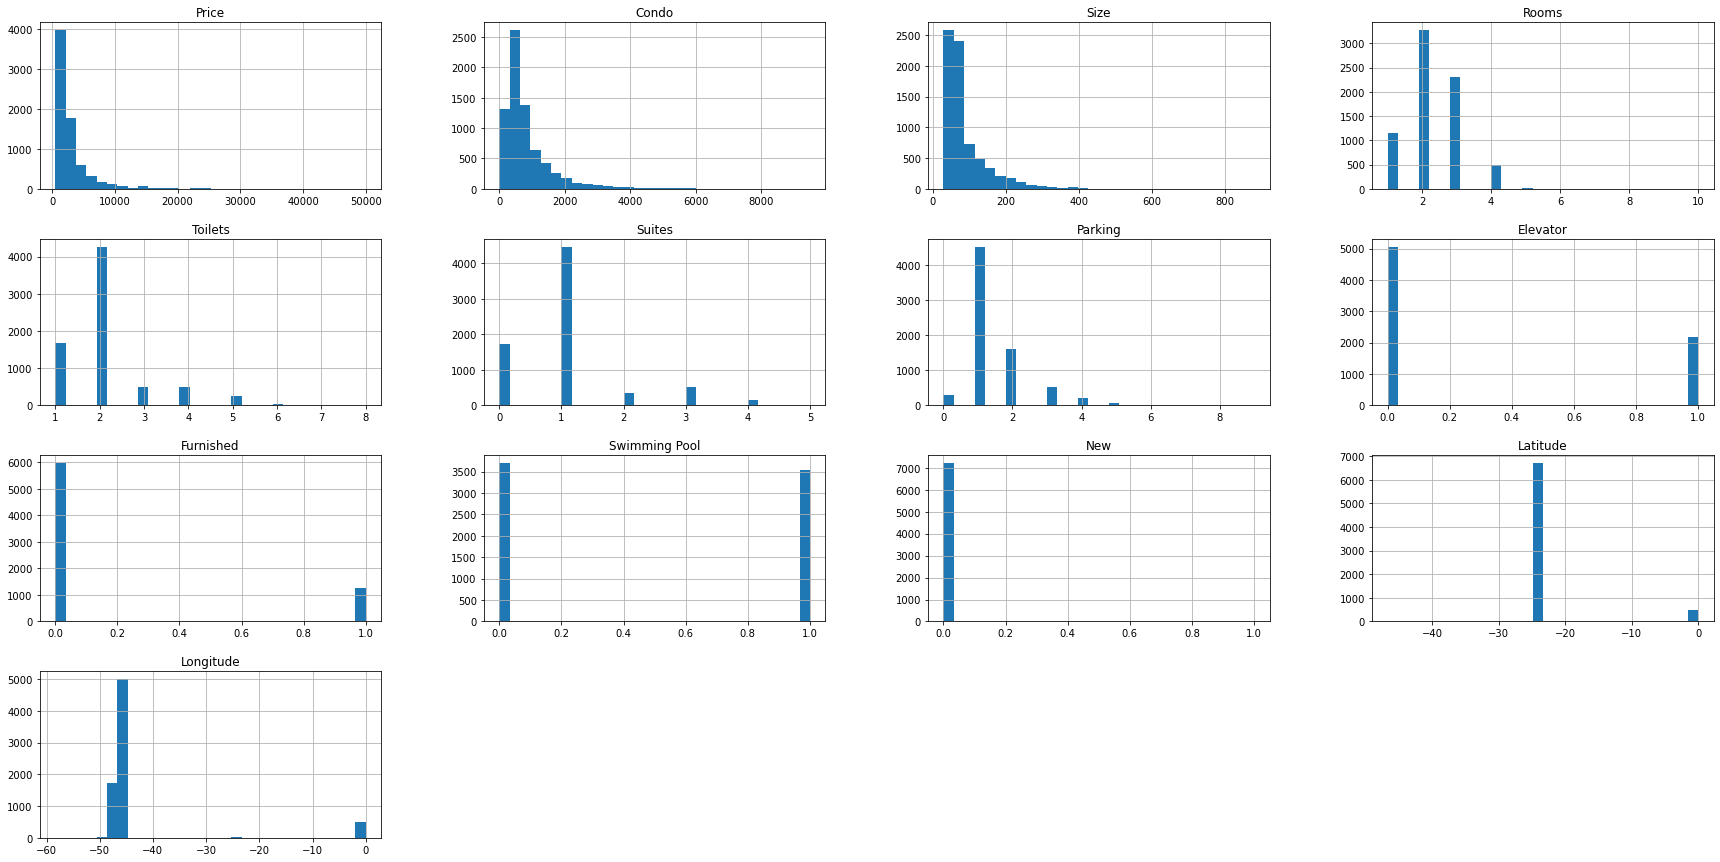

In [13]:
df_rent.hist(bins=30, figsize=(30, 15));

In [14]:
df_rent["Property Type"].value_counts()

apartment    7228
Name: Property Type, dtype: int64

In [15]:
df_rent["District"].value_counts()

Mooca/São Paulo              178
Moema/São Paulo              163
Vila Mariana/São Paulo       161
Morumbi/São Paulo            159
Pinheiros/São Paulo          153
                            ... 
Lajeado/São Paulo              8
Guaianazes/São Paulo           6
Parque do Carmo/São Paulo      6
Jardim São Luis/São Paulo      3
Grajaú/São Paulo               2
Name: District, Length: 94, dtype: int64

In [17]:
df_rent.corr()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
Price,1.000000,0.700361,0.731795,0.390951,0.583488,0.588329,0.640743,0.031860,0.171859,0.206884,-0.008477,-0.036935,-0.038362
Condo,0.700361,1.000000,0.812374,0.494153,0.596520,0.597069,0.703888,0.020271,0.075928,0.198613,-0.011678,-0.045458,-0.048381
Size,0.731795,0.812374,1.000000,0.673232,0.694294,0.701954,0.752954,0.006993,0.005886,0.148408,-0.017416,-0.043168,-0.046238
Rooms,0.390951,0.494153,0.673232,1.000000,0.557247,0.545859,0.592387,0.000993,-0.104705,0.151225,-0.022166,-0.050753,-0.052897
Toilets,0.583488,0.596520,0.694294,0.557247,1.000000,0.920932,0.703447,0.143176,0.068190,0.262526,-0.007862,-0.128304,-0.129482
Suites,0.588329,0.597069,0.701954,0.545859,0.920932,1.000000,0.718788,0.106189,0.068014,0.267219,-0.006231,-0.130413,-0.131519
Parking,0.640743,0.703888,0.752954,0.592387,0.703447,0.718788,1.000000,0.027476,0.066077,0.304904,0.001547,-0.054828,-0.057929
Elevator,0.031860,0.020271,0.006993,0.000993,0.143176,0.106189,0.027476,1.000000,0.095207,0.150773,0.044049,-0.117160,-0.108175
Furnished,0.171859,0.075928,0.005886,-0.104705,0.068190,0.068014,0.066077,0.095207,1.000000,0.185192,0.012224,-0.022449,-0.018386
Swimming Pool,0.206884,0.198613,0.148408,0.151225,0.262526,0.267219,0.304904,0.150773,0.185192,1.000000,0.019915,-0.025033,-0.020293


In [18]:
df_rent.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.731795
Condo            0.700361
Parking          0.640743
Suites           0.588329
Toilets          0.583488
Rooms            0.390951
Swimming Pool    0.206884
Furnished        0.171859
Elevator         0.031860
New             -0.008477
Latitude        -0.036935
Longitude       -0.038362
Name: Price, dtype: float64

### Etapa 4: Preparação de Dados para Modelos de ML

### Limpeza de dados desnecessários

In [19]:
# Removendo colunas New, Property Type, Negotiation Type
df_cleaned = df_rent.drop(["New", "Property Type", "Negotiation Type"], axis=1)

In [20]:
df_cleaned.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,Artur Alvim/São Paulo,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,Artur Alvim/São Paulo,-23.525025,-46.482436


### Tratamento de dados categóricos

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Instanciando a classe
ordinal_encoder = OrdinalEncoder()

In [22]:
# District é transformada em valores
district_encoded = ordinal_encoder.fit_transform(df_cleaned[["District"]])
district_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [9.],
       [9.],
       [9.]])

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Instanciando a classe
cat_encoder = OneHotEncoder()

In [24]:
# Cria uma coluna pra cada Bairro e substitue por 0 e 1 para as ocorrências
housing_cat_1hot = cat_encoder.fit_transform(df_cleaned[["District"]])
housing_cat_1hot

<7228x94 sparse matrix of type '<class 'numpy.float64'>'
	with 7228 stored elements in Compressed Sparse Row format>

In [25]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
housing_cat_1hot.toarray().shape

(7228, 94)

In [27]:
cat_encoder.categories_

[array(['Alto de Pinheiros/São Paulo', 'Anhanguera/São Paulo',
        'Aricanduva/São Paulo', 'Artur Alvim/São Paulo',
        'Barra Funda/São Paulo', 'Bela Vista/São Paulo', 'Belém/São Paulo',
        'Bom Retiro/São Paulo', 'Brasilândia/São Paulo',
        'Brooklin/São Paulo', 'Brás/São Paulo', 'Butantã/São Paulo',
        'Cachoeirinha/São Paulo', 'Cambuci/São Paulo',
        'Campo Belo/São Paulo', 'Campo Grande/São Paulo',
        'Campo Limpo/São Paulo', 'Cangaíba/São Paulo',
        'Capão Redondo/São Paulo', 'Carrão/São Paulo',
        'Casa Verde/São Paulo', 'Cidade Ademar/São Paulo',
        'Cidade Dutra/São Paulo', 'Cidade Líder/São Paulo',
        'Cidade Tiradentes/São Paulo', 'Consolação/São Paulo',
        'Cursino/São Paulo', 'Ermelino Matarazzo/São Paulo',
        'Freguesia do Ó/São Paulo', 'Grajaú/São Paulo',
        'Guaianazes/São Paulo', 'Iguatemi/São Paulo', 'Ipiranga/São Paulo',
        'Itaim Bibi/São Paulo', 'Itaim Paulista/São Paulo',
        'Itaquera/Sã

In [28]:
one_hot = pd.get_dummies(df_cleaned["District"])

df = df_cleaned.drop('District',axis = 1)
df = df.join(one_hot)
df

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
0,930,220,47,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,148,45,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,100,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,200,48,2,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1300,410,55,2,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595,73,1,2,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11206,21000,3000,208,4,4,3,3,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11207,3800,710,55,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
11208,5000,2354,205,3,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Etapa 5: Seleção e Treino Múltiplos Modelos

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Y = df["Price"]
X = df.loc[:, df.columns != "Price"]

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

### Regressão Linear

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [39]:
# Observação de predições
some_data = X.iloc[:5]
some_labels = Y.iloc[:5]

print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [ 897.09240723  832.82861328  919.98718262  925.81030273 1049.71459961]
Labels: [930, 1000, 1000, 1000, 1300]


In [35]:
some_data

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,Latitude,...,Vila Jacuí/São Paulo,Vila Leopoldina/São Paulo,Vila Madalena/São Paulo,Vila Maria/São Paulo,Vila Mariana/São Paulo,Vila Matilde/São Paulo,Vila Olimpia/São Paulo,Vila Prudente/São Paulo,Vila Sônia/São Paulo,Água Rasa/São Paulo
4794,413,60,3,1,0,1,0,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
9547,550,74,3,3,1,2,0,1,1,-23.559367,...,0,0,0,0,0,0,0,0,0,1
1476,718,64,2,2,1,2,0,0,1,-23.624423,...,0,0,0,0,0,0,0,0,0,0
4192,384,50,2,1,0,1,1,0,1,-23.602246,...,0,0,0,0,0,0,0,0,1,0
4665,780,90,2,2,1,1,0,0,0,-23.540881,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Avaliação do Modelo
from sklearn.metrics import mean_squared_error

# Predições do modelo 
preds = lin_reg.predict(x_train)

# Comparação de valor previsto com valor real
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

1875.610267390113

### Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Instanciando
tree_reg = DecisionTreeRegressor()

# Treinamento
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
# Avaliação do Modelo
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(tree_mse)
tree_rmse

39.62793579178219

Otimize os modelos com os próprios dados de treino para posteriormente usar os dados de teste

### Avaliação mais precisa usando Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [1756.1135134  1869.67059005 2756.80412484 2531.8131595  2303.78435359
 2522.20443765 2259.20699136 2356.23647793 1890.70194592 2286.23477292]
Mean: 2253.2770367142557
Standard deviation: 307.16494441517835


In [45]:
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [1.67939468e+03 1.70827614e+10 2.19940286e+03 2.10123704e+03
 2.36588793e+03 2.19100861e+03 1.53338406e+03 2.11154459e+03
 1.72892035e+03 1.49394737e+03]
Mean: 1708277878.0463564
Standard deviation: 5124827832.563245


### RandomForest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

622.0797560015424

In [48]:
scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [1349.70030012 1486.76346069 2043.36138592 1686.28924892 2019.53426148
 2128.66555618 1362.33512273 1744.06143271 1376.76507531 1367.49126858]
Mean: 1656.496711263786
Standard deviation: 297.35458995719466


### Etapa 6: Avaliando e Otimizando seu Modelo

### Otimizando seu modelo através do GridSearch

In [49]:
from sklearn.model_selection import GridSearchCV

# Teste de todas as combinações de parâmetros para serem testados
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [51]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [52]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2097.5161685030257 {'max_features': 2, 'n_estimators': 3}
1867.6928472909196 {'max_features': 2, 'n_estimators': 10}
1787.9082957710852 {'max_features': 2, 'n_estimators': 30}
2070.775491971084 {'max_features': 4, 'n_estimators': 3}
1889.325674175052 {'max_features': 4, 'n_estimators': 10}
1806.3161463443178 {'max_features': 4, 'n_estimators': 30}
2157.2901070859816 {'max_features': 6, 'n_estimators': 3}
1907.3704429356815 {'max_features': 6, 'n_estimators': 10}
1803.2098502327729 {'max_features': 6, 'n_estimators': 30}
2086.111995695422 {'max_features': 8, 'n_estimators': 3}
1877.8020404265658 {'max_features': 8, 'n_estimators': 10}
1778.080592077863 {'max_features': 8, 'n_estimators': 30}
2048.5388912845024 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1866.794995129349 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2045.8806777094742 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1782.4573476641772 {'bootstrap': False, 'max_features': 3, 'n_esti

### Avaliando seu modelo em dados de teste

In [53]:
# Comparando com os Dados de Teste
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

1966.8960850927335


In [ ]:
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                     go.Scatter(y=final_predictions)])

fig.show()

## Fundamentos dos Modelos de Classificação

# Capítulo 6.1.3: Explorando o Dataset

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784", version=1)

In [ ]:
mnist.keys()

In [ ]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.float)

In [ ]:
x

In [ ]:
plt.imshow(x[0].reshape(28, 28), cmap="binary")

### Classificador binário

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
y_train_5 = (y_train == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

In [ ]:
n = 2
plt.imshow(x[0].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acurácia de um modelo

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

### A matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

In [ ]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

### Classificação multiclasse

In [ ]:
sgd_clf.fit(x_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

## Abrindo a Caixa Preta - Como os Modelos Aprendem

# Capítulo 7.1.2: Regressão Linear

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use("seaborn-darkgrid")

### O treinamento de um modelo de regressão linear

In [67]:
# Equações Ficticias para o exemplo:

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

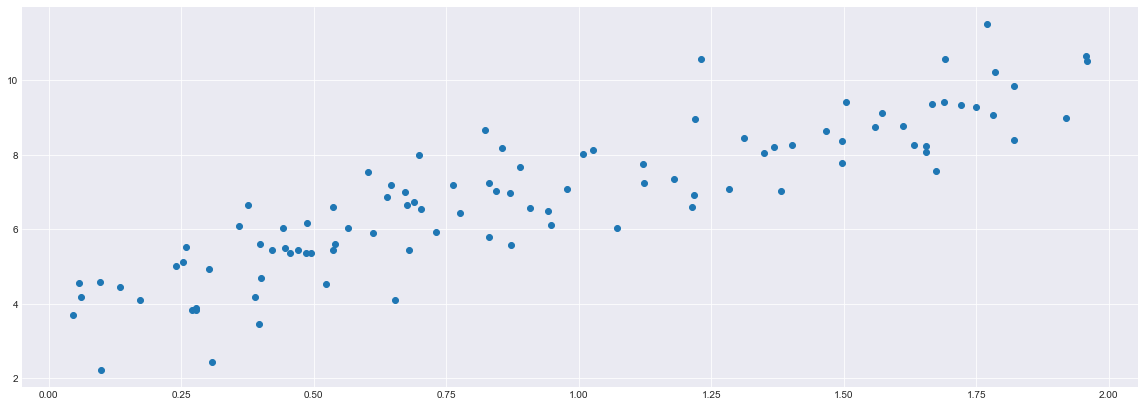

In [68]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y);

# Capítulo 7.1.5: Equação Normal na Prática

In [70]:
# Concatenando um vetor de mesmo tamanho com x_b
x_b = np.c_[np.ones((100, 1)), x]

In [72]:
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta
# linalg.inv - Módulo de álgebra linear numpy, matriz inversa
# theta chegou bem próximo dos valores da equção

array([[3.98818872],
       [3.12799569]])

In [73]:
y_hat = theta[0] + x * theta[1]
y_hat

array([[10.11081484],
       [ 4.85761594],
       [ 4.17733117],
       [ 9.03062347],
       [ 9.27457173],
       [ 5.11268421],
       [ 6.71111139],
       [ 6.18180543],
       [ 8.31033073],
       [ 4.16719869],
       [ 9.27306874],
       [ 6.93223157],
       [ 8.20662414],
       [ 8.90243011],
       [ 4.41083271],
       [ 4.74008944],
       [ 8.375484  ],
       [ 5.66540257],
       [ 8.09194439],
       [ 4.2964186 ],
       [ 6.41460772],
       [ 6.5847867 ],
       [ 5.16303656],
       [ 4.7991018 ],
       [ 6.56352924],
       [ 6.62469289],
       [ 6.82668889],
       [ 6.27258182],
       [ 5.20722322],
       [ 9.55733404],
       [ 7.79747043],
       [ 5.75110435],
       [ 5.50533812],
       [ 5.51300733],
       [ 9.16687961],
       [10.11587609],
       [ 6.00487659],
       [ 9.68583541],
       [ 9.16505989],
       [ 5.532626  ],
       [ 6.11310123],
       [ 9.99057533],
       [ 5.98479152],
       [ 6.17335856],
       [ 9.09212544],
       [ 4

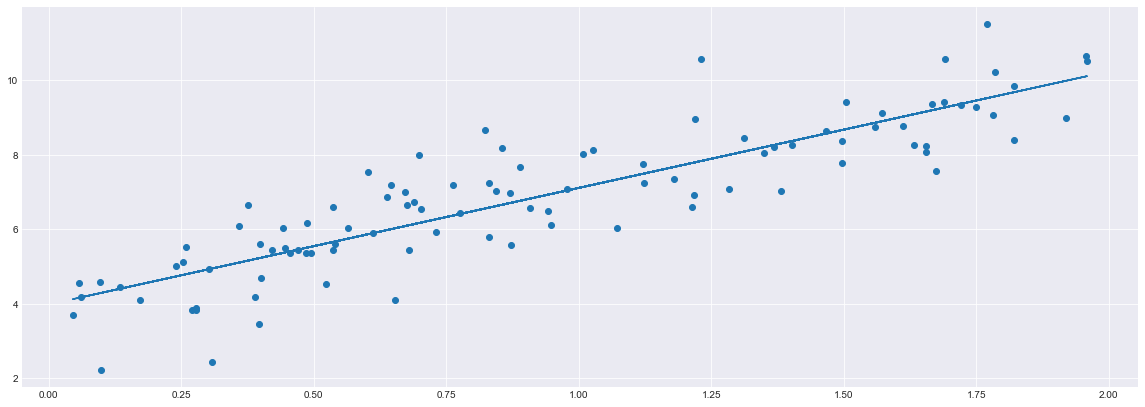

In [75]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat)
plt.scatter(x, y);

# Capítulo 7.1.7: Gradient Descent na Prática

### Regressão linear no sklearn

In [79]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.98818872]), array([[3.12799569]]))

In [ ]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2, 1)  # random initialization

fig, ax = plt.subplots(figsize=(25, 8))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_hat = theta[0] + x * theta[1]
    
    ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations, color="blue")

## Batch Gradient Descent

In [90]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

In [ ]:
eta = 0.01  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

In [ ]:
eta = 0.5  # learning rate
n_iterations = 10
m = 100
theta = np.random.randn(2,1)  # random initialization

fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=0.3 + iteration / n_iterations)
ax.set_title("Eta: {}".format(eta))

# Capítulo 7.1.9: Regressões Polinomiais

In [94]:
# Criando dados aleatórios

m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

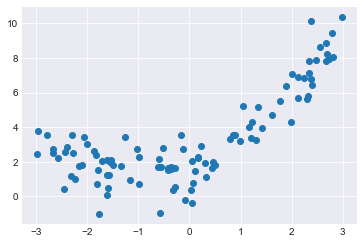

In [95]:
plt.scatter(x, y)

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [103]:
x_poly[0]

array([-2.10349414,  4.4246876 ])

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

In [105]:
lin_reg.intercept_

array([1.76263242])

In [106]:
lin_reg.coef_

array([[1.05206212, 0.53420317]])

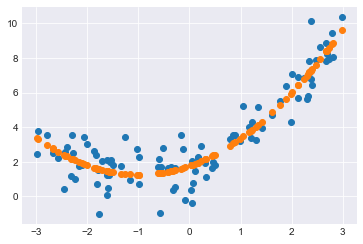

In [108]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly));

# Capítulo 7.1.10: Balanço Viés-Variança

### O que acontece se a complexidade do modelo for aumentada desnecessariamente?

(-4.0, 4.0)

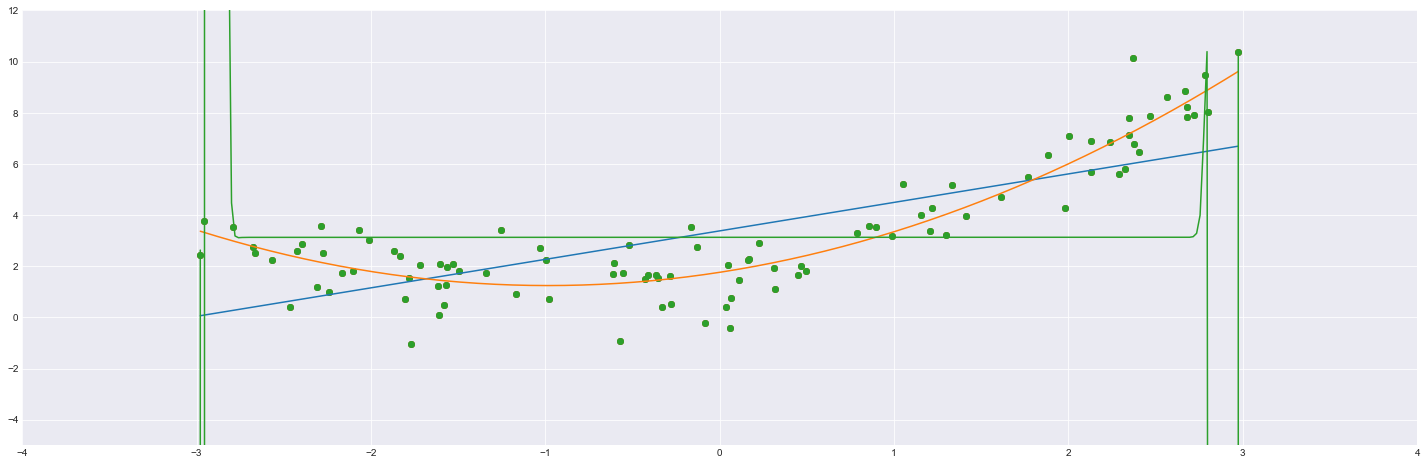

In [109]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

# Capítulo 7.1.12: Ridge Regression na Prática

In [110]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

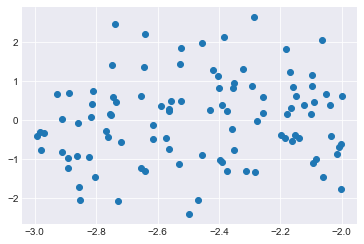

In [112]:
plt.scatter(x, y)

In [113]:
from sklearn.linear_model import Ridge

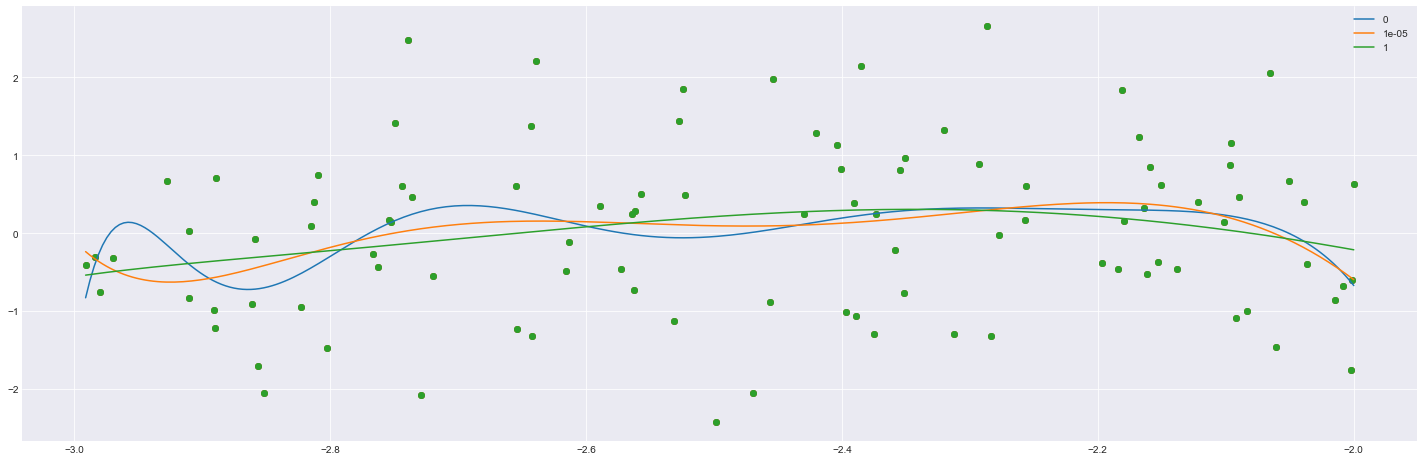

In [114]:
fig, ax = plt.subplots(figsize=(25, 8))
for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)
ax.legend()

# Capítulo 7.1.15: Regressão Logística na Prática

In [115]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [118]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)

In [119]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

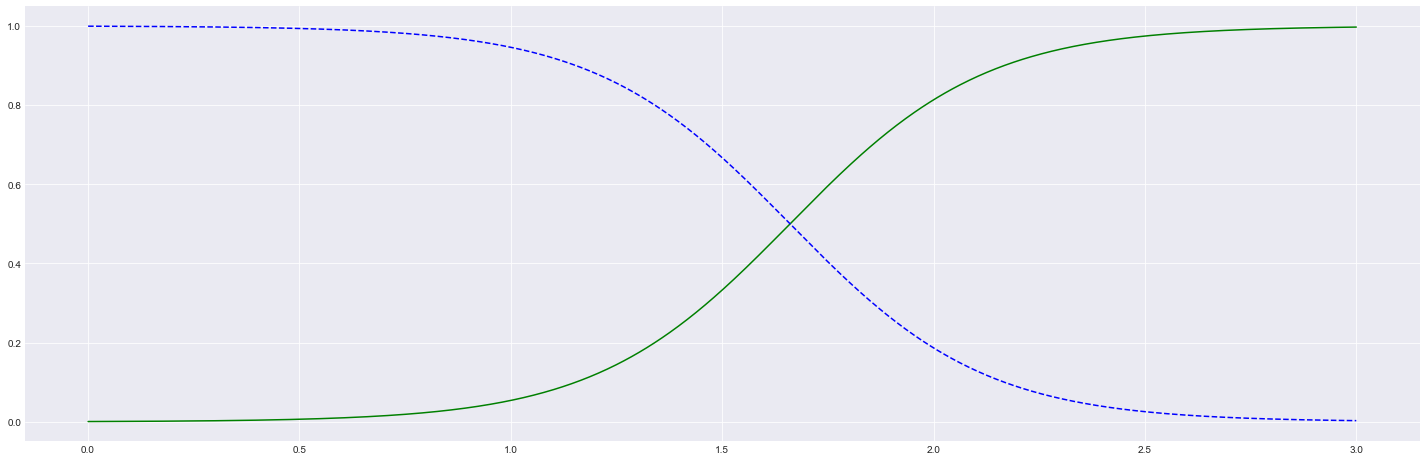

In [120]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

# Capítulo 7.1.16: Softmax Regression

In [121]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, multi_class='multinomial')

In [122]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

0.6931471805599453

In [123]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plot_decision_boundary()

## Modelos Inteligentes de Árvores

# Capítulo 8.1.2: O que é uma Áárvore de Decisão

## Decision Trees

In [136]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [127]:
iris = load_iris()

In [128]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [129]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [130]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [131]:
x = iris.data[:, 2:] # petal length and width
y = iris.target

In [132]:
# Instanciando a classe
tree_clf = DecisionTreeClassifier(max_depth=2)

In [133]:
# Treinando
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

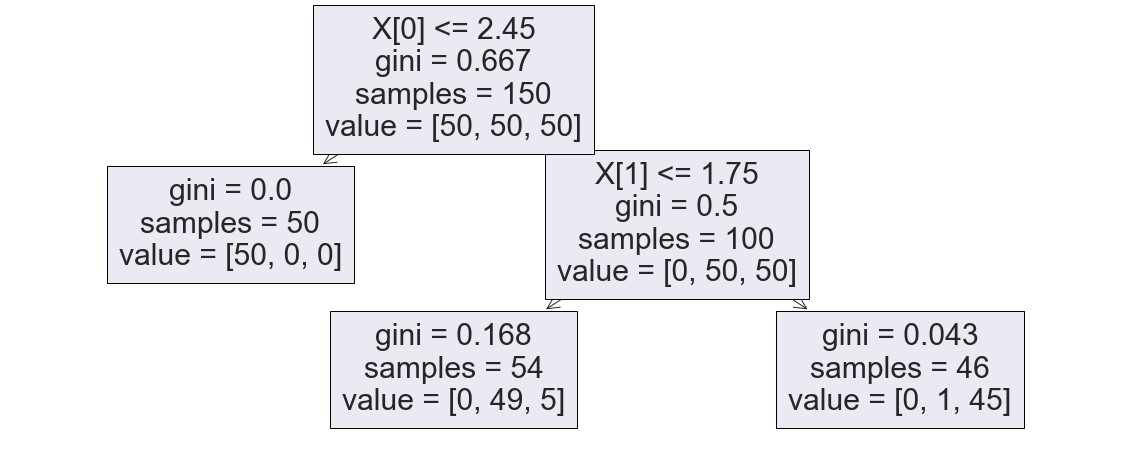

In [143]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(tree_clf)

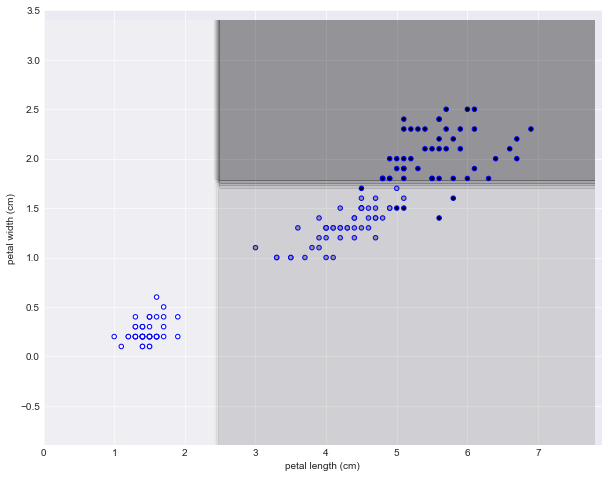

In [145]:
# Plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="b")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(iris["feature_names"][2])
ax.set_ylabel(iris["feature_names"][3])

plt.show()

# Capítulo 8.1.6: Overfitting em Modelos de Árvores

In [146]:
from sklearn.datasets import make_blobs

In [147]:
plt.style.use("seaborn-darkgrid")

x, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=2)

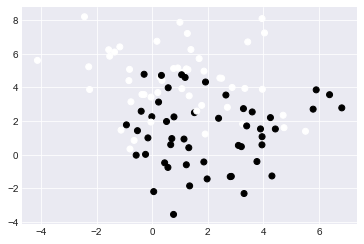

In [155]:
plt.style.use("seaborn-dark-palette")
plt.scatter(x[:, 0], x[:, 1], c=y);

In [161]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=50)
tree_clf.fit(x, y)

DecisionTreeClassifier(max_depth=50)

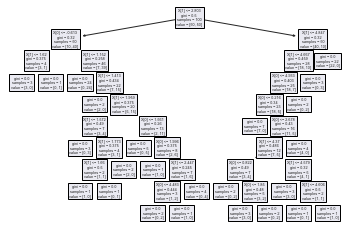

In [162]:
tree.plot_tree(tree_clf);

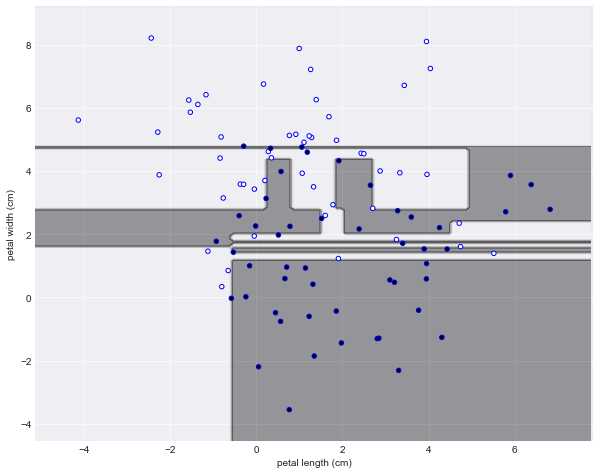

In [163]:
# Plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="b")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(iris["feature_names"][2])
ax.set_ylabel(iris["feature_names"][3])

plt.show()

A medida que **aumentamos a profundidade** da árvore (DecisionTreeClassifier(**max_depth**=50)), mais o modelo vai adquirir especifidades dos dados que não gostariamos que tivesse, causando overfitting.

# Capítulo 8.1.7: Decision Trees em problemas de regressão

### DecisionTreee Regressor

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [165]:
# Create a random dataset
rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

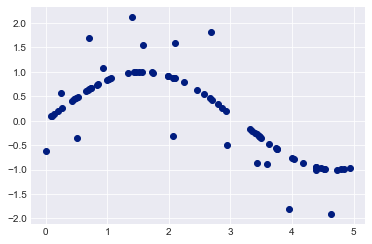

In [166]:
plt.scatter(x, y)

In [167]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

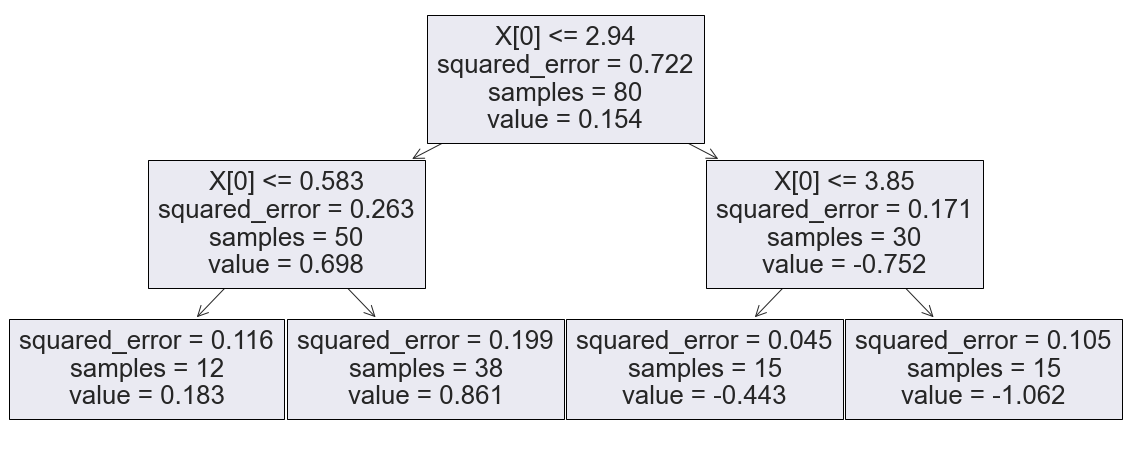

In [168]:
fig, ax = plt.subplots(figsize=(20, 8))
tree.plot_tree(regr_1);

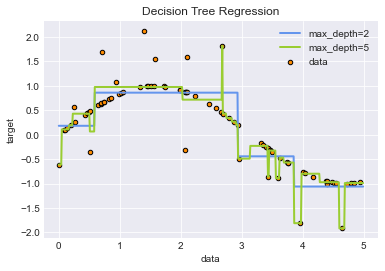

In [169]:
# Predict
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Capítulo 8.1.10: Ensemble Learning na prática

### Ensemble Learning

In [209]:
from sklearn.datasets import load_breast_cancer

In [210]:
breast_cancer = load_breast_cancer()

In [211]:
x = breast_cancer.data[:, 3:5] # petal length and width
y = breast_cancer.target

In [212]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [213]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [214]:
breast_cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [215]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [216]:
log_clf = LogisticRegression()
tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [217]:
voting_clf = VotingClassifier(
    # NOME, INSTANCIA DO CLASSIFICADOR
    estimators=[('lr', log_clf), ('tree', tree_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svc', SVC())])

In [218]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.847953216374269
DecisionTreeClassifier 0.8421052631578947
SVC 0.8771929824561403
VotingClassifier 0.8771929824561403


# Capítulo 8.1.12: Random Forests

In [219]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [220]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)
tree_clf = DecisionTreeClassifier(max_depth=40)

In [221]:
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [222]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=40)

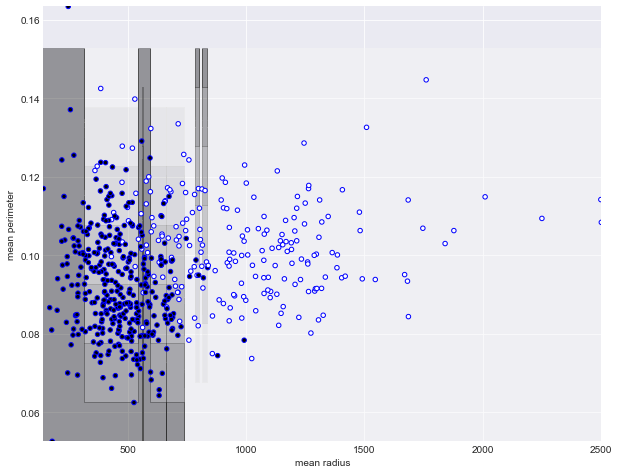

In [223]:
# Plotting decision regions - tree_clf
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="b")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

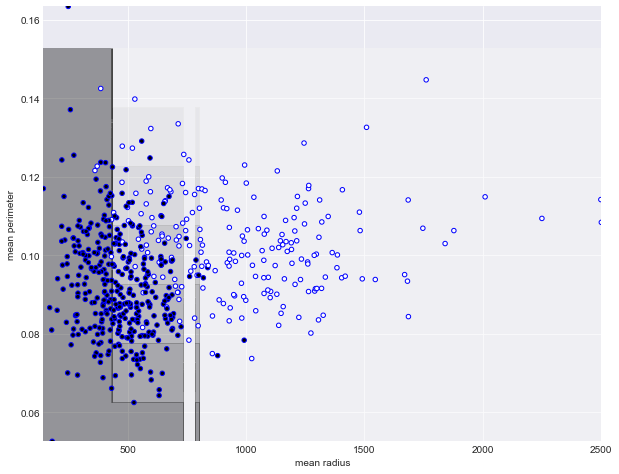

In [224]:
# Plotting decision regions - bag_clf
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="b")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

In [225]:
for clf in [tree_clf, bag_clf]:
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

0.847953216374269
0.9064327485380117


In [227]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

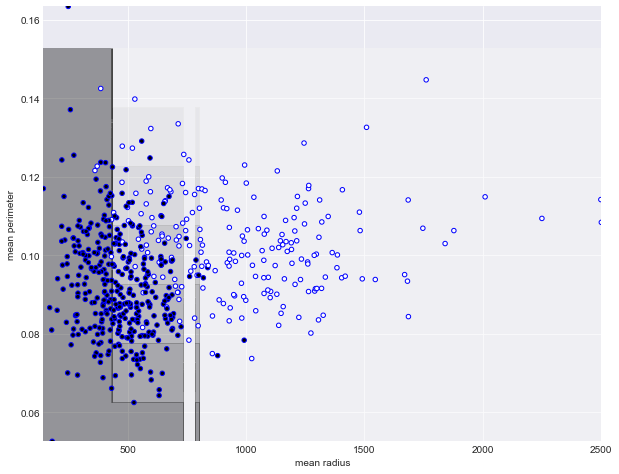

In [229]:
# Plotting decision regions
x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(sharex="col", sharey="row", figsize=(10, 8))

Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor="b")

ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_xlabel(breast_cancer["feature_names"][0])
ax.set_ylabel(breast_cancer["feature_names"][2])

plt.show()

# Capítulo 8.1.13: Feature Importance

In [230]:
breast_cancer = load_breast_cancer()
x = breast_cancer.data # petal length and width
y = breast_cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [231]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=1000)

<AxesSubplot:>

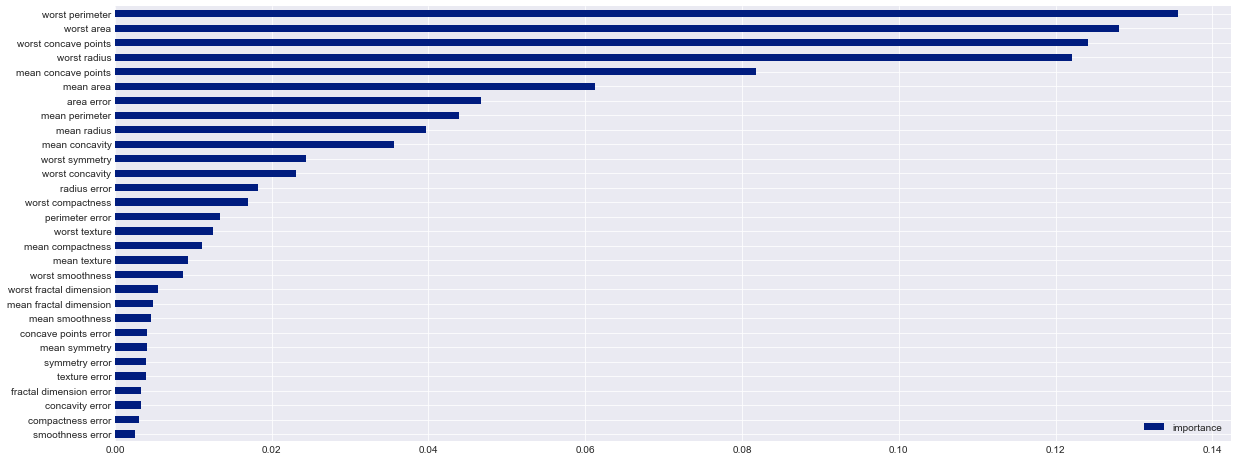

In [232]:
feature_importances = pd.DataFrame(rnd_clf.feature_importances_,
                                   index = breast_cancer["feature_names"],
                                    columns=['importance']).sort_values('importance', ascending=True)

fig, ax = plt.subplots(figsize=(20, 8))
feature_importances.plot(kind="barh", ax=ax)

## Unsupervised Learning

# Capítulo 9.1.2: KMeans na Prática

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
plt.style.use("seaborn-darkgrid")

### K-Means Clustering

In [235]:
from sklearn.datasets import make_blobs

In [236]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2],random_state=101)

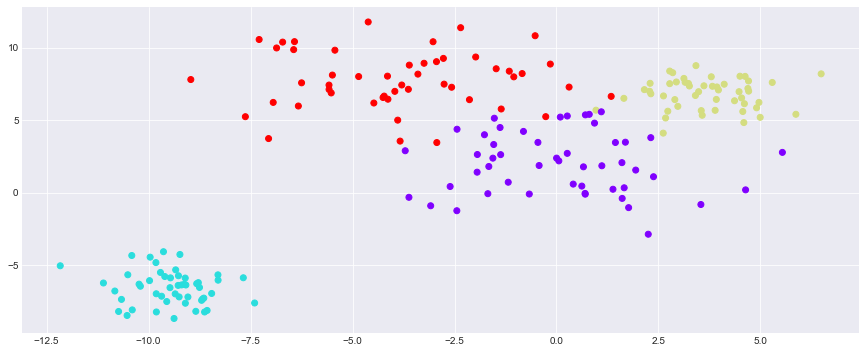

In [237]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')

In [238]:
from sklearn.cluster import KMeans

In [239]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [240]:
kmeans.cluster_centers_

array([[-4.26532727,  8.04228496],
       [-9.45212819, -6.56470497],
       [ 3.22962915,  6.57426507],
       [-0.31922142,  1.65750485]])

In [241]:
kmeans.labels_

array([0, 2, 3, 2, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 3,
       2, 1, 0, 1, 1, 3, 2, 2, 0, 1, 2, 3, 3, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       3, 2, 0, 3, 1, 2, 3, 0, 2, 3, 1, 0, 2, 3, 0, 2, 1, 2, 1, 0, 2, 3,
       1, 2, 2, 1, 2, 2, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 2, 1, 3, 3, 3, 0,
       2, 1, 1, 1, 1, 3, 2, 1, 2, 0, 1, 2, 3, 1, 3, 3, 2, 3, 1, 2, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0,
       3, 1, 1, 0, 2, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 0, 0, 0, 0, 3, 2,
       3, 0, 2, 2, 2, 3, 2, 3, 3, 0, 1, 0, 3, 2, 0, 3, 2, 3, 0, 2, 2, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 0, 1, 2, 2, 2,
       1, 3])

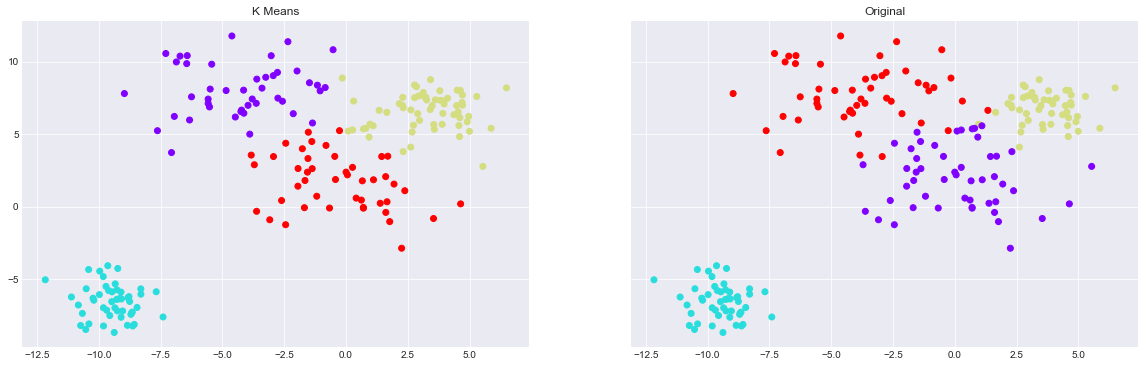

In [242]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20, 6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Capítulo 9.1.4: Problemas do K-Means

In [245]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification

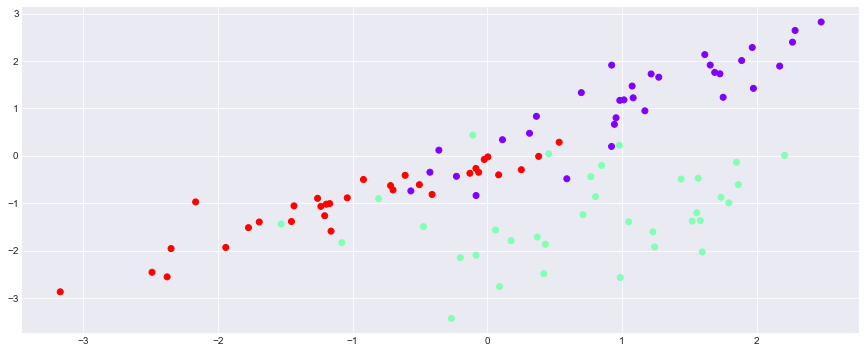

In [246]:
data = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, 
                           n_classes=3, random_state=21)

fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

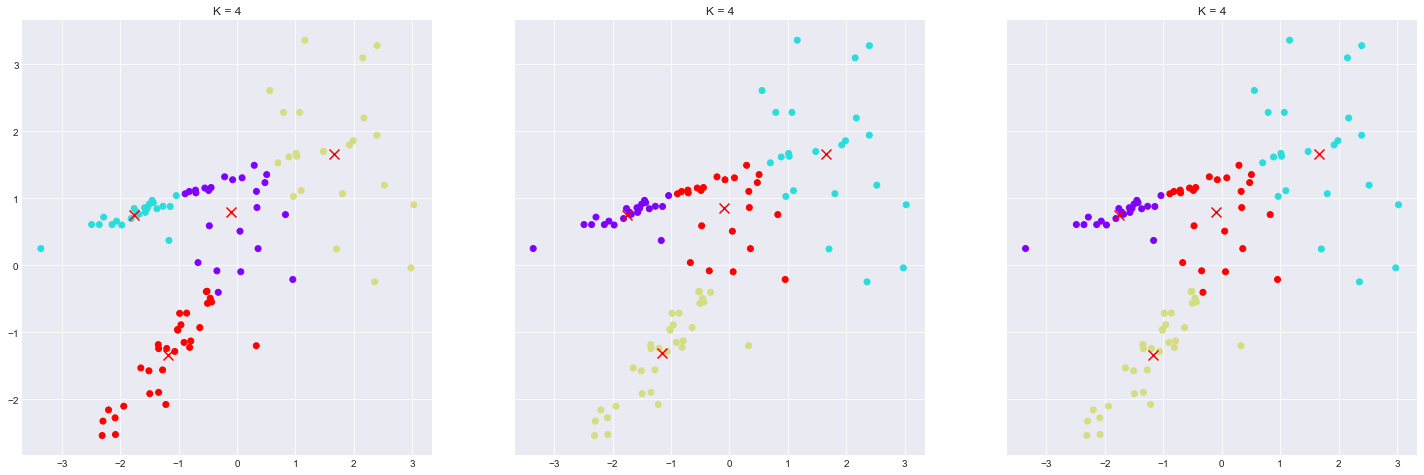

In [247]:
n = 3
f, ax = plt.subplots(1, n, sharey=True,figsize=(25, 8))

data = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, 
                           n_classes=3, random_state=24)

i = 0
for _ in range(n):
    ax[i].set_title('K = 4'.format(4))
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(data[0])

    ax[i].scatter(data[0][:,0],data[0][:,1], c=kmeans.labels_, cmap="rainbow")
    ax[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", color="red", s=100)
    i += 1

# Capítulo 9.1.5: O método do Cotovelo

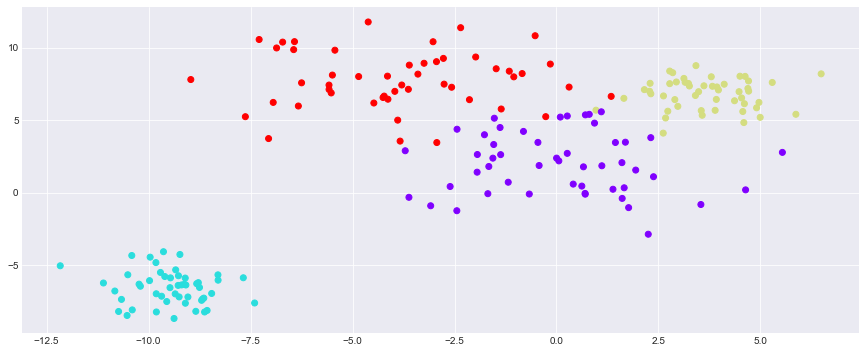

In [248]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=[2, 1, 1, 2],random_state=101)
fig, ax = plt.subplots(figsize=(15, 6))
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [249]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

KMeans(n_clusters=4)

In [250]:
kmeans.inertia_

993.767191313033

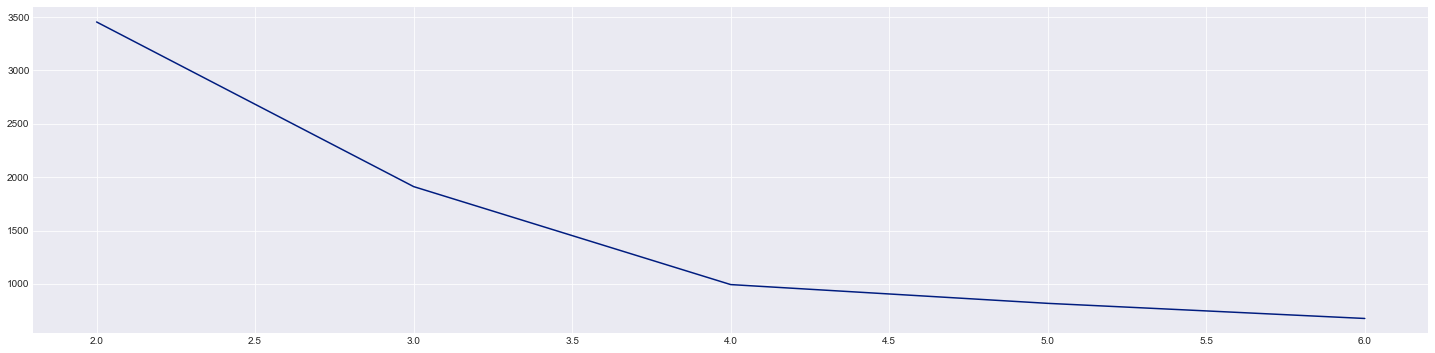

In [251]:
f, ax = plt.subplots(figsize=(25, 6))

list_inertia = []
list_k = []
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[0])
    
    list_inertia += [kmeans.inertia_]
    list_k += [k]
ax.plot(list_k, list_inertia)

# Capítulo 9.1.9: Gaussian Mixture Models na Prática

In [252]:
from sklearn.datasets import make_gaussian_quantiles

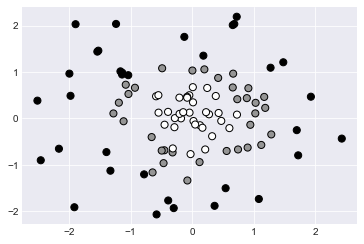

In [253]:
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=50, edgecolor="k")

In [254]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3)
gm.fit(X1)

GaussianMixture(n_components=3)

In [255]:
gm.weights_

array([0.18446287, 0.19795164, 0.61758548])

In [256]:
gm.means_

array([[-1.12222234,  0.77669297],
       [-0.60358719, -1.00575553],
       [ 0.37277982,  0.23795658]])

In [257]:
gm.covariances_

array([[[ 0.37553627, -0.18667142],
        [-0.18667142,  0.42315224]],

       [[ 1.02055341, -0.09379428],
        [-0.09379428,  0.47397983]],

       [[ 0.50452906,  0.01064942],
        [ 0.01064942,  0.58921402]]])

In [258]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, **kwargs):
    ax = plt.gca()
    
    # Convert covariance to principal axes
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    width, height = 2 * np.sqrt(s)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

In [259]:
def plot_gmm(gmm, X):
    fig, ax = plt.subplots(figsize=(20, 8))
    
    labels=gmm.predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    w_factor = 0.2/gmm.weights_.max()
    for pos, covar, w, c in zip(gmm.means_, gmm.covariances_, gmm.weights_, ["red", "blue", "green"]):
        draw_ellipse(pos, covar, alpha=w * w_factor, color=c)

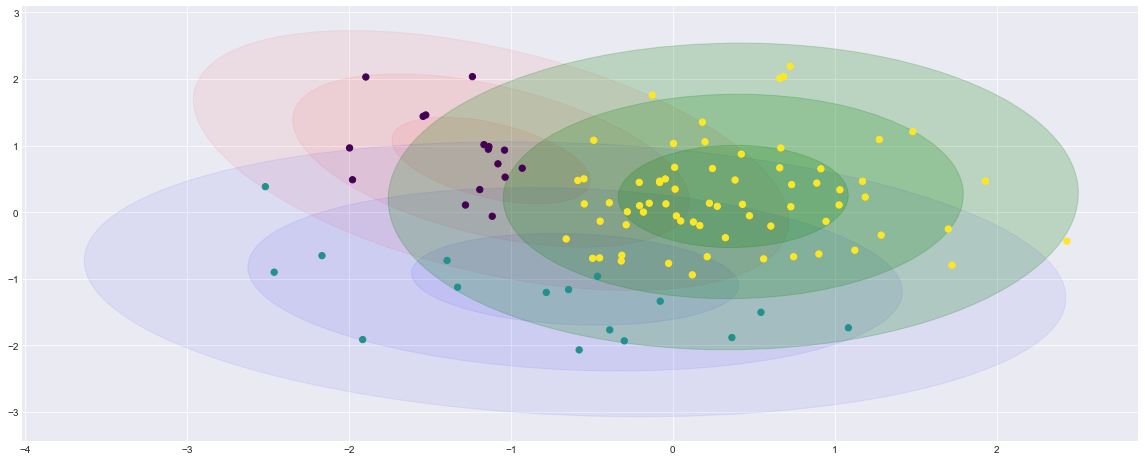

In [260]:
plot_gmm(gm, X1)

# Capítulo 9.1.10: Detecção de anomalias e geração de novas estimativas

In [261]:
gm.sample(10)

(array([[ 4.85182389e-01,  1.12142715e-03],
        [-1.96664996e-02, -9.49012182e-01],
        [-2.70401552e-01, -5.67972660e-01],
        [ 6.81012058e-01, -5.41432292e-01],
        [ 1.48699174e-01,  1.12389487e+00],
        [ 7.21827982e-01,  4.43062543e-01],
        [ 3.92496735e-01,  4.78802216e-01],
        [ 1.42494810e+00,  1.28322075e+00],
        [-7.21908598e-01,  1.00213287e+00],
        [-3.72194576e-01, -6.99721469e-02]]),
 array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2]))

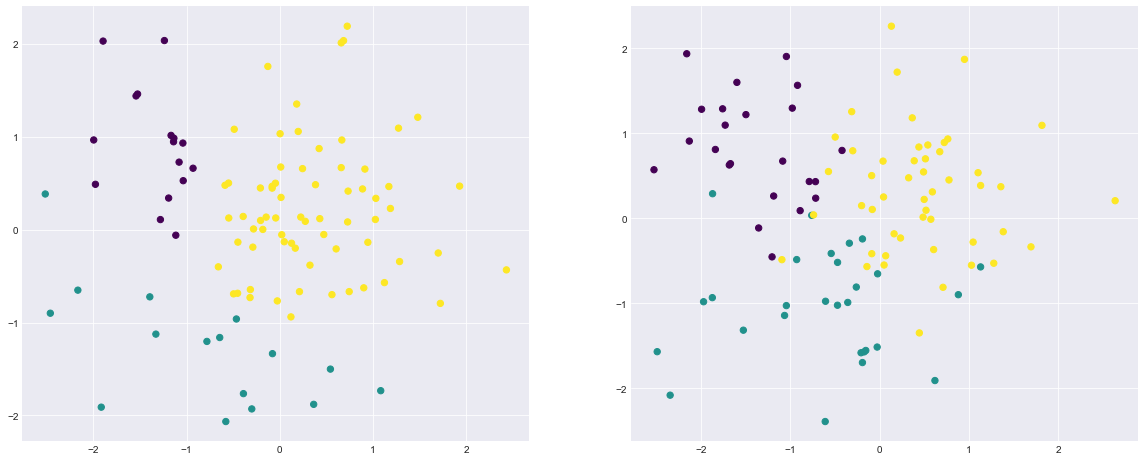

In [262]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

labels=gm.predict(X1)
ax[0].scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')

X_new, Y_new = gm.sample(100)
ax[1].scatter(X_new[:, 0], X_new[:, 1], c=Y_new, s=40, cmap='viridis')

In [263]:
X1.shape

(100, 2)

In [264]:
gm.score_samples(X1)

array([-1.82413554, -2.1385102 , -3.02642639, -4.22743919, -2.04534919,
       -4.42134159, -1.75201765, -2.27645127, -2.1365054 , -2.73437693,
       -2.50993179, -1.68031239, -3.28656657, -2.04025387, -2.02008904,
       -2.33179885, -4.03599737, -1.83055261, -2.13155901, -2.23671164,
       -1.82146901, -3.38985502, -5.05707018, -1.88898786, -1.73311643,
       -2.35661796, -3.87989896, -1.7338735 , -2.59211674, -4.31243246,
       -3.56152225, -1.81651376, -2.37958351, -1.81201158, -1.92182501,
       -3.11224616, -2.37569826, -1.86675899, -2.88996925, -2.37912033,
       -1.73797724, -2.72867065, -1.85348556, -2.40400376, -2.38022838,
       -1.87177917, -4.53371966, -2.49056412, -3.31030146, -2.26036093,
       -2.37674983, -2.79658884, -2.20781169, -2.26288786, -2.12236144,
       -2.25021447, -4.60801063, -1.914525  , -2.84526013, -1.95017424,
       -6.22736762, -1.93927061, -1.74446359, -4.44065021, -1.77142525,
       -2.41762995, -2.0448174 , -4.14482621, -1.66771248, -2.95

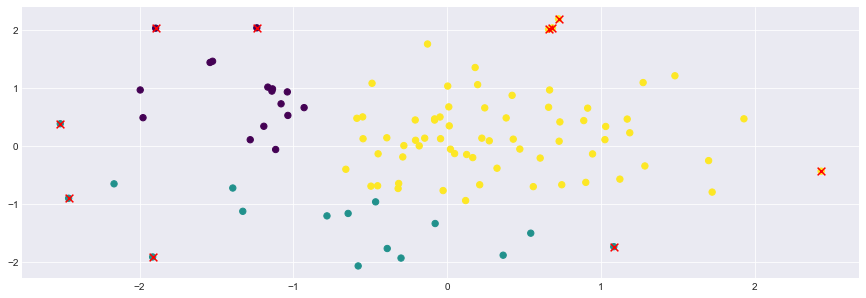

In [265]:
densities = gm.score_samples(X1)
densities_threshold = np.percentile(densities, 10)
anomalies = X1[densities < densities_threshold]

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(X1[:, 0], X1[:, 1], c=labels, s=40, cmap='viridis')
ax.scatter(anomalies[:, 0], anomalies[:, 1], c="red", s=60, marker="x", cmap='viridis')